# Titanic Dataset – Exploratory Data Analysis (EDA)

**Author:** *Garima Negi*  
**Dataset:** Titanic - Machine Learning from Disaster (Kaggle)  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn  

##  Objective
The goal of this EDA is to analyze the Titanic dataset to uncover patterns, trends, and anomalies that could help understand the survival outcomes of passengers.

---


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('train.csv')


Saving train.csv to train (1).csv


## Step 1: Basic Data Exploration
We begin by checking:
- Structure of the dataset
- Summary statistics
- Missing values
- Category distributions


In [6]:
# Structure of dataset
df.info()

# Summary statistics
df.describe()

# Missing values
df.isnull().sum()

# Value counts for key categorical variables
print("\n--- Value Counts for 'Sex' ---")
print(df['Sex'].value_counts())

print("\n--- Value Counts for 'Pclass' ---")
print(df['Pclass'].value_counts())

print("\n--- Value Counts for 'Embarked' ---")
print(df['Embarked'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Value Counts for 'Sex' ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Value Counts for 'Pclass' ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

--- Value Counts for 'Embarked' ---
Embarked
S    644
C   

##  Step 2: Univariate Analysis
  
This process helps in identifying:
- The central tendency and dispersion of numerical variables.
- The frequency distribution of categorical variables.
- The presence of outliers or unusual patterns.

The following visualizations are used:
- **Histograms** for understanding the distribution of numerical features such as *Age* and *Fare*.  
- **Boxplots** for detecting outliers and examining the spread of continuous variables.  
- **Bar charts** for visualizing the frequency of categories such as *Sex* and *Pclass*.

This analysis forms the foundation for subsequent bivariate and multivariate explorations by highlighting important patterns and potential anomalies in individual features.


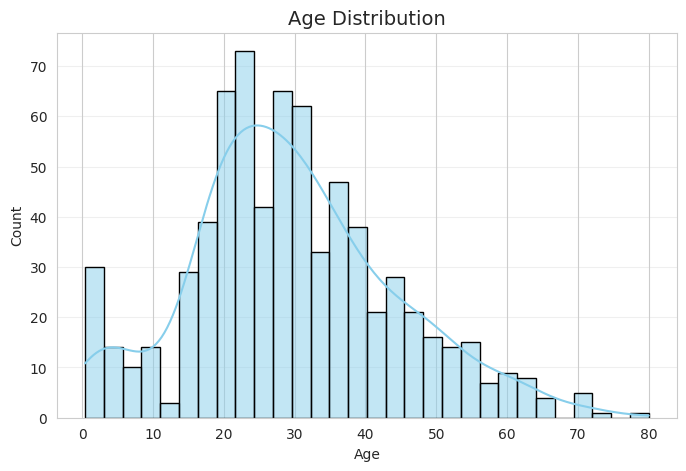

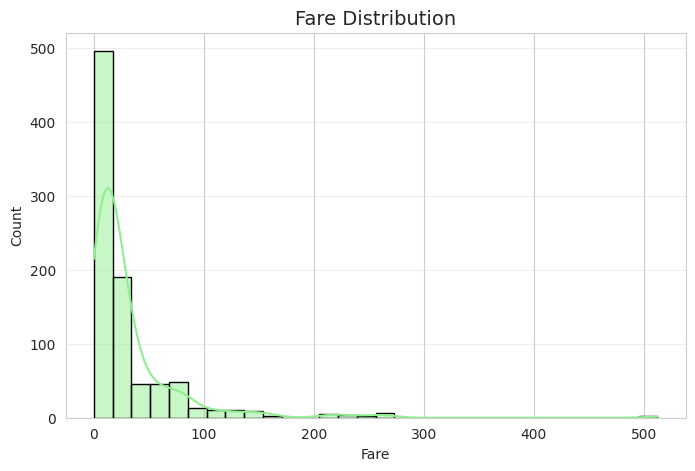

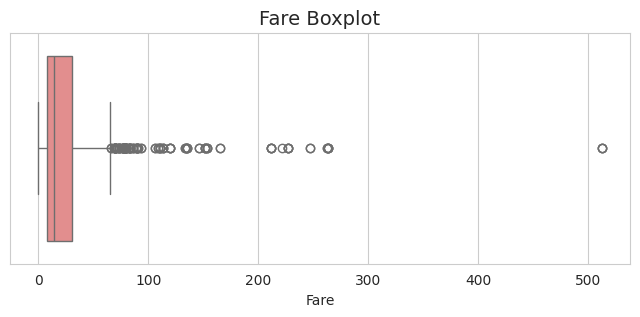

/tmp/ipython-input-2857684001.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


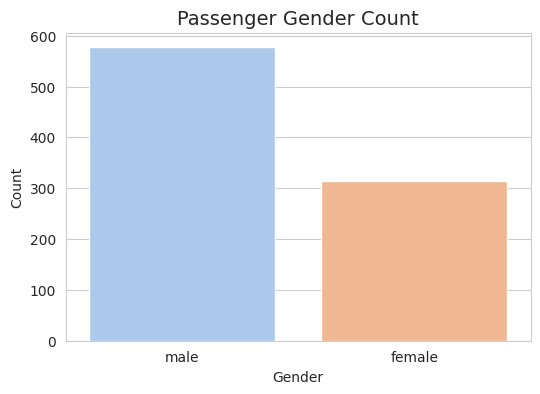

/tmp/ipython-input-2857684001.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


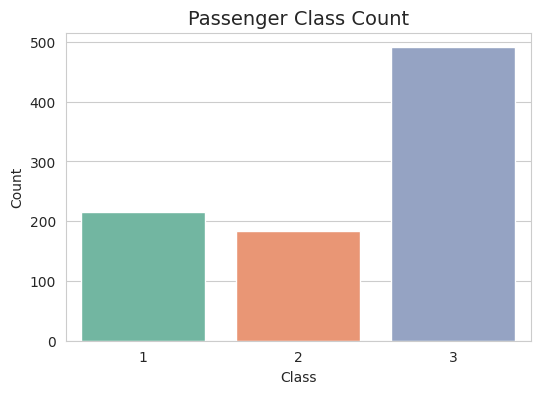

In [9]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution', fontsize=14)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Fare boxplot
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Fare'], color='lightcoral')
plt.title('Fare Boxplot', fontsize=14)
plt.show()

# Gender count
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Passenger Gender Count', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Passenger class count
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Passenger Class Count', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



## Observations, Univariate Analysis

1. **Age Distribution**  
   - Most passengers were between 20 and 40 years old, with a clear peak in the mid-20s.  
   - There were fewer elderly passengers who were over 60 years.  
   - The distribution shows a moderate spread, indicating a mix of age groups on board.

2. **Fare Distribution**  
   - Most ticket fares were in the lower range, suggesting that many passengers traveled in lower classes.  
   - A small number of passengers paid much higher fares, indicating some premium ticket holders.  
   - The fare distribution skews to the right because of these high-value outliers.

3. **Fare Boxplot**  
   - Outliers are clearly visible on the higher end, confirming the skewness observed in the histogram.  
   - The interquartile range (IQR) indicates that most fares fall within a narrow price band.

4. **Gender Count**  
   - There were more male passengers than female passengers on board.  
   - This imbalance is an important factor when looking at survival rates.

5. **Passenger Class Count**  
   - Third-class passengers made up the largest group, followed by second and first class.  
   - This shows the social and economic diversity of the passengers on the Titanic.

## Step 4: Multivariate Analysis
Exploring patterns with more than two variables.


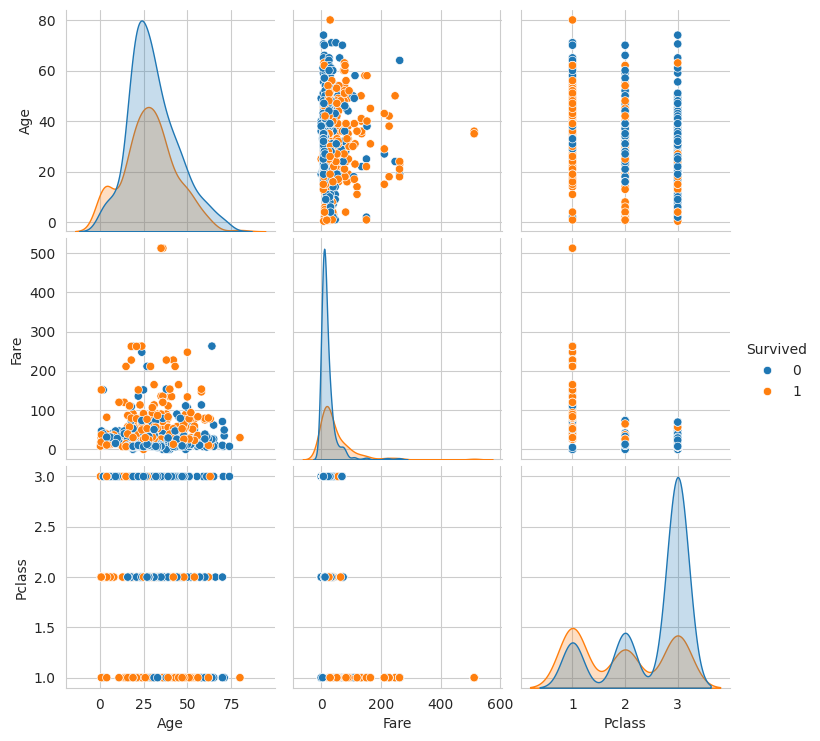

In [11]:
sns.pairplot(df[['Survived','Age','Fare','Pclass']], hue='Survived')
plt.show()


## Observations, Multivariate Analysis

1. The pairplot shows clear separation in some feature combinations, especially between **Pclass** and **Fare**. First-class passengers consistently paid higher ticket prices.
2. Survival rates are noticeably higher among passengers in **Pclass 1**. Many of them are in the higher fare range.
3. There is a distinct concentration of non-survivors in **third class**, particularly among passengers with lower fares.
4. Age does not show a strong direct link to survival when looked at with Fare and Pclass. However, younger passengers are present in all classes.
5. The visual patterns suggest that **passenger class** and **fare** are more important factors for survival probability than age alone.

## Step 5: Summary of Findings
- Women had a significantly higher survival rate than men.
- Passengers in first class had better chances of survival.
- Younger passengers had slightly better survival rates.
- Higher ticket prices generally related to higher survival probability.
